# Project Instructions
It's necessary to develop a data transformation algorithm that would make it hard to recover personal information if the data fell into the wrong hands. This is called data masking, or data obfuscation. But the data should be protected in such a way that the quality of machine learning models doesn't suffer. You don't need to pick the best model, just prove that the algorithm works correctly.

- Load the data.
- Check that the data is free of issues — there is no missing data, extreme values, and so on.
- Work on each task and answer the questions posed in the project template.
- Draw conclusions based on your experience working on the project.
- There is some precode in the project template, feel free to use it, some precode needs to be finished first. 
- Also, -there are two appendices in the project template with useful information.

# Data Description
- Features: insured person's gender, age, salary, and number of family members.
- Target: number of insurance benefits received by an insured person over the last five years.


# Statement

The Sure Tomorrow insurance company wants to solve several tasks with the help of Machine Learning and you are asked to evaluate that possibility.

- Task 1: Find customers who are similar to a given customer. This will help the company's agents with marketing.
- Task 2: Predict whether a new customer is likely to receive an insurance benefit. Can a prediction model do better than a dummy model?
- Task 3: Predict the number of insurance benefits a new customer is likely to receive using a linear regression model.
- Task 4: Protect clients' personal data without breaking the model from the previous task. It's necessary to develop a data transformation algorithm that would make it hard to recover personal information if the data fell into the wrong hands. This is called data masking, or data obfuscation. But the data should be protected in such a way that the quality of machine learning models doesn't suffer. You don't need to pick the best model, just prove that the algorithm works correctly.

## Data Preprocessing & Exploration

### Initialization

In [1]:
pip install scikit-learn --upgrade

     |████████████████████████████████| 30.8 MB 35.6 MB/s eta 0:00:01
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 0.24.1
    Uninstalling scikit-learn-0.24.1:
ERROR: Could not install packages due to an OSError: [Errno 13] Permission denied: 'COPYING'
Consider using the `--user` option or check the permissions.

Note: you may need to restart the kernel to use updated packages.


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math


import seaborn as sns

import sklearn.linear_model
import sklearn.metrics
import sklearn.neighbors
import sklearn.preprocessing

from sklearn.model_selection import train_test_split

from IPython.display import display

### Load Data

Load data and conduct a basic check that it's free from obvious issues.

In [3]:
df = pd.read_csv('/datasets/insurance_us.csv')

We rename the colums to make the code look more consistent with its style.

In [4]:
df = df.rename(columns={'Gender': 'gender', 'Age': 'age', 'Salary': 'income', 'Family members': 'family_members', 'Insurance benefits': 'insurance_benefits'})

In [5]:
df.sample(10)

,gender,age,income,family_members,insurance_benefits
1775,1,18.0,48900.0,1,0
596,1,29.0,40300.0,1,0
1961,1,19.0,46700.0,1,0
4923,0,48.0,58200.0,0,1
1771,1,38.0,20900.0,2,0
2665,1,35.0,23500.0,1,0
3563,0,29.0,40900.0,0,0
4390,0,34.0,43800.0,1,0
489,1,22.0,32600.0,1,0
4473,1,29.0,41900.0,2,0


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   gender              5000 non-null   int64  
 1   age                 5000 non-null   float64
 2   income              5000 non-null   float64
 3   family_members      5000 non-null   int64  
 4   insurance_benefits  5000 non-null   int64  
dtypes: float64(2), int64(3)
memory usage: 195.4 KB


In [7]:
# we may want to fix the age type (from float to int) though this is not critical
df.age = df.age.astype(int)
# write your conversion here if you choose:

In [8]:
# check to see that the conversion was successful
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   gender              5000 non-null   int64  
 1   age                 5000 non-null   int64  
 2   income              5000 non-null   float64
 3   family_members      5000 non-null   int64  
 4   insurance_benefits  5000 non-null   int64  
dtypes: float64(1), int64(4)
memory usage: 195.4 KB


In [9]:
# now have a look at the data's descriptive statistics. 
df.describe()
# Does everything look okay?


,gender,age,income,family_members,insurance_benefits
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000
mean,0.499000,30.952800,39916.360000,1.194200,0.148000
std,0.500049,8.440807,9900.083569,1.091387,0.463183
min,0.000000,18.000000,5300.000000,0.000000,0.000000
25%,0.000000,24.000000,33300.000000,0.000000,0.000000
50%,0.000000,30.000000,40200.000000,1.000000,0.000000
75%,1.000000,37.000000,46600.000000,2.000000,0.000000
max,1.000000,65.000000,79000.000000,6.000000,5.000000


In [10]:
# check for missing values
df.isnull().sum()

gender                0
age                   0
income                0
family_members        0
insurance_benefits    0
dtype: int64

### Conclusion
The data was loaded successfully and consists of 5000 rows and 5 columns. For convenience, the columns were renamed and the age column was converted from float to int datatype. Also, there are no missing values in the data. The data can now be explored further using exploratory data analysis.

## Exploratory Data Analysis

Let's quickly check whether there are certain groups of customers by looking at the pair plot.

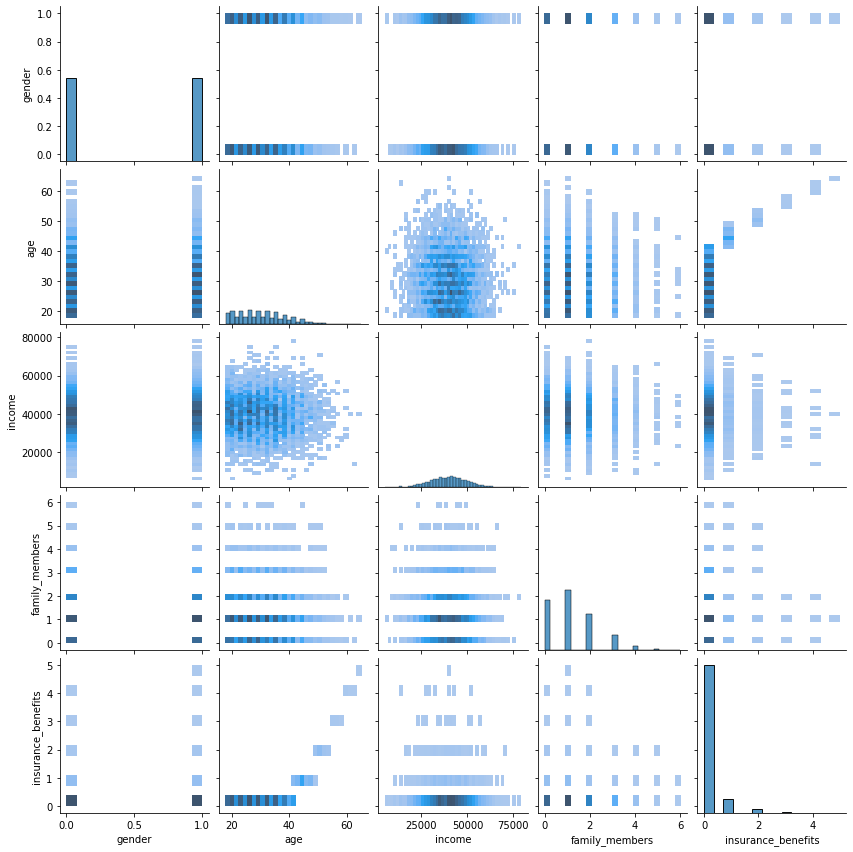

In [11]:
g = sns.pairplot(df, kind='hist')
g.fig.set_size_inches(12, 12)

Ok, it is a bit difficult to spot obvious groups (clusters) as it is difficult to combine several variables simultaneously (to analyze multivariate distributions). That's where LA and ML can be quite handy.

## Tasks

### Task 1. Similar Customers

In the language of ML, it is necessary to develop a procedure that returns k nearest neighbors (objects) for a given object based on the distance between the objects.

You may want to review the following lessons (chapter -> lesson)
- Distance Between Vectors -> Euclidean Distance
- Distance Between Vectors -> Manhattan Distance

To solve the task, we can try different distance metrics.

Write a function that returns k nearest neighbors for an $n^{th}$ object based on a specified distance metric. The number of received insurance benefits should not be taken into account for this task. 

You can use a ready implementation of the kNN algorithm from scikit-learn (check [the link](https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.NearestNeighbors.html#sklearn.neighbors.NearestNeighbors)) or use your own.

Test it for four combination of two cases
- Scaling
  - the data is not scaled
  - the data is scaled with the [MaxAbsScaler](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.MaxAbsScaler.html) scaler
- Distance Metrics
  - Euclidean
  - Manhattan

Answer these questions:
- Does the data being not scaled affect the kNN algorithm? If so, how does that appear?
- How similar are the results using the Manhattan distance metric (regardless of the scaling)?

In [12]:
feature_names = ['gender', 'age', 'income', 'family_members']

In [13]:
def get_knn(df, n, k, metric):
    
    """
    Returns k nearest neighbors

    :param df: pandas DataFrame used to find similar objects within
    :param n: object no for which the nearest neighbours are looked for
    :param k: the number of the nearest neighbours to return
    :param metric: name of distance metric
    """

    nbrs = sklearn.neighbors.NearestNeighbors(n_neighbors=k, metric=metric) 
    nbrs.fit(df[feature_names].values)
    nbrs_distances, nbrs_indices = nbrs.kneighbors(df.iloc[n][feature_names].values.reshape(1, -1), k, return_distance=True)
    
    df_res = pd.concat([
        df.iloc[nbrs_indices[0]], 
        pd.DataFrame(nbrs_distances.T, index=nbrs_indices[0], columns=['distance'])
        ], axis=1)
    
    return df_res

Scaling the data.

In [14]:
# columns to be scaled

feature_names = ['gender', 'age', 'income', 'family_members']

# fit the scaler

transformer_mas = sklearn.preprocessing.MaxAbsScaler().fit(df[feature_names].to_numpy())

# create copy and apply scaler

df_scaled = df.copy()
df_scaled.loc[:, feature_names] = transformer_mas.transform(df[feature_names].to_numpy())

In [15]:
# check scaled sample
df_scaled.sample(5)

,gender,age,income,family_members,insurance_benefits
1497,0.0,0.615385,0.402532,0.333333,0
969,1.0,0.569231,0.436709,0.166667,0
1934,1.0,0.553846,0.382278,0.166667,0
605,1.0,0.476923,0.658228,0.333333,0
4342,1.0,0.292308,0.672152,0.166667,0


Now, let's get similar records for a given one for every combination

In [16]:
# euclidean distance with unscaled data

get_knn(df[feature_names], 0, 10, 'euclidean')

,gender,age,income,family_members,distance
0,1,41,49600.0,1,0.000000
2022,1,41,49600.0,0,1.000000
1225,0,42,49600.0,0,1.732051
4031,1,44,49600.0,2,3.162278
3424,0,38,49600.0,0,3.316625
815,1,37,49600.0,2,4.123106
4661,0,45,49600.0,0,4.242641
2125,0,37,49600.0,2,4.242641
2349,1,46,49600.0,2,5.099020
3900,1,36,49600.0,0,5.099020


In [17]:
# euclidean distance with scaled data

get_knn(df_scaled[feature_names], 0, 10, 'euclidean')

,gender,age,income,family_members,distance
0,1.0,0.630769,0.627848,0.166667,0.000000
2689,1.0,0.630769,0.634177,0.166667,0.006329
133,1.0,0.615385,0.636709,0.166667,0.017754
4869,1.0,0.646154,0.637975,0.166667,0.018418
3275,1.0,0.646154,0.651899,0.166667,0.028550
1567,1.0,0.615385,0.602532,0.166667,0.029624
2103,1.0,0.630769,0.596203,0.166667,0.031646
3365,1.0,0.630769,0.596203,0.166667,0.031646
124,1.0,0.661538,0.635443,0.166667,0.031693
3636,1.0,0.615385,0.600000,0.166667,0.031815


In [18]:
# manhattan (city block) distance with unscaled data

get_knn(df[feature_names], 0, 10, 'manhattan')

,gender,age,income,family_members,distance
0,1,41,49600.0,1,0.0
2022,1,41,49600.0,0,1.0
1225,0,42,49600.0,0,3.0
4031,1,44,49600.0,2,4.0
815,1,37,49600.0,2,5.0
3424,0,38,49600.0,0,5.0
2125,0,37,49600.0,2,6.0
3900,1,36,49600.0,0,6.0
2349,1,46,49600.0,2,6.0
4661,0,45,49600.0,0,6.0


In [19]:
get_knn(df_scaled[feature_names], 0, 10, 'manhattan')


,gender,age,income,family_members,distance
0,1.0,0.630769,0.627848,0.166667,0.000000
2689,1.0,0.630769,0.634177,0.166667,0.006329
133,1.0,0.615385,0.636709,0.166667,0.024245
4869,1.0,0.646154,0.637975,0.166667,0.025511
3365,1.0,0.630769,0.596203,0.166667,0.031646
2103,1.0,0.630769,0.596203,0.166667,0.031646
124,1.0,0.661538,0.635443,0.166667,0.038364
4305,1.0,0.630769,0.588608,0.166667,0.039241
3275,1.0,0.646154,0.651899,0.166667,0.039435
1567,1.0,0.615385,0.602532,0.166667,0.040701


#### Conclusion
**Does the data being not scaled affect the kNN algorithm? If so, how does that appear?** 

Feature scaling is important for kNN algorithms as it calculates distances between data. The unscaled data affects the kNN algorithm because the algorithm attaches more importance to certain features with higher ranging numbers than other.  kNN with euclidean distance is sensitive to magnitudes hence, the data should be scaled for all features to weigh in equally.

**How similar are the results using the Manhattan distance metric (regardless of the scaling)?** 

The first 1st nearest neighbor is identical for both Manhattan distance metric, regardless of scaling. However, after that the results differs.



### Task 2. Is Customer Likely to Receive Insurance Benefit?

In terms of machine learning we can look at this like a binary classification task.

With `insurance_benefits` being more than zero as the target, evaluate whether the kNN classification approach can do better than a dummy model.

Instructions:
- Build a KNN-based classifier and measure its quality with the F1 metric for k=1..10 for both the original data and the scaled one. That'd be interesting to see how k may influece the evaluation metric, and whether scaling the data makes any difference. You can use a ready implemention of the kNN classification algorithm from scikit-learn (check [the link](https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html)) or use your own.
- Build the dummy model which is just random for this case. It should return "1" with some probability. Let's test the model with four probability values: 0, the probability of paying any insurance benefit, 0.5, 1.

The probability of paying any insurance benefit can be defined as

$$
P\{\text{insurance benefit received}\}=\frac{\text{number of clients received any insurance benefit}}{\text{total number of clients}}.
$$

Split the whole data in the 70:30 proportion for the training/testing parts.

In [20]:
# calculate the target

df['insurance_benefits_received'] = (df['insurance_benefits'] > 0).astype(int)


In [21]:
# check for the class imbalance with value_counts()

df['insurance_benefits_received'].value_counts()


0    4436
1     564
Name: insurance_benefits_received, dtype: int64

There is a clear class imbalance among customers who received insurance benefits, with a majority of customers not receiving benefits. This class imbalance can create bias and affect our predictive model's accuracy.

In [22]:
# function to compute metrics

def eval_classifier(y_true, y_pred):
    
    f1_score = sklearn.metrics.f1_score(y_true, y_pred)
    print(f'F1: {f1_score:.2f}')
    
# if you have an issue with the following line, restart the kernel and run the notebook again
    cm = sklearn.metrics.confusion_matrix(y_true, y_pred, normalize='all')
    print('Confusion Matrix')
    print(cm)

In [23]:
# generating output of a random model

def rnd_model_predict(P, size, seed=42):

    rng = np.random.default_rng(seed=seed)
    return rng.binomial(n=1, p=P, size=size)

#### Measure F1 metric on unscaled data using KNN-based classifier


In [24]:
# split data into train and test sets

train, test = train_test_split(df, test_size=0.3, stratify=df['insurance_benefits_received'], random_state=12345)

X_train = train[feature_names]
X_test = test[feature_names]
y_train = train['insurance_benefits_received']
y_test = test['insurance_benefits_received']

In [25]:
# fit the data

knn = sklearn.neighbors.KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)


KNeighborsClassifier(n_neighbors=3)

In [26]:
# make prediction

knn.predict(X_test).sum()

68

In [27]:
# evaluate metrics

eval_classifier(y_test, knn.predict(X_test))

F1: 0.40
Confusion Matrix
[[0.87333333 0.014     ]
 [0.08133333 0.03133333]]


In [28]:
# model performance using unscaled data and k from 1 to 10

print('Unscaled data:')
unscaled_f1 = []
for k in range(1,11):
    knn = sklearn.neighbors.KNeighborsClassifier(n_neighbors=k) 
    knn.fit(X_train, y_train)
    knc_pred = knn.predict(X_test)
    f1_score = sklearn.metrics.f1_score(y_test, knc_pred)
    unscaled_f1.append(f1_score)
    print(f'N_neighbors: {k}, F1: {f1_score:.2f}')


Unscaled data:
N_neighbors: 1, F1: 0.59
N_neighbors: 2, F1: 0.39
N_neighbors: 3, F1: 0.40
N_neighbors: 4, F1: 0.16
N_neighbors: 5, F1: 0.15
N_neighbors: 6, F1: 0.06
N_neighbors: 7, F1: 0.07
N_neighbors: 8, F1: 0.05
N_neighbors: 9, F1: 0.05
N_neighbors: 10, F1: 0.00


From the above computation, we can see that k influences the evaluation metric. The higher the value of k the lower the F1 score recorded .i.e. when K was increased from 1 to 10, the F1 score decreased significantly. The highest F1 score value was obtained using a k value of 1.

#### Measure F1 metric on scaled data using KNN-based classifier


In [29]:
# calculate target for scaled data

df_scaled['insurance_benefits_received'] = (df_scaled['insurance_benefits'] > 0).astype(int)
df_scaled.head()

# feature and target for unscaled data
X = df[feature_names]
y = df['insurance_benefits_received']

# produce only feature columns for scaled data
X_scaled = df_scaled[feature_names]

# split data into train and test sets
X_train, X_test, y_train, y_test, X_train_scaled, X_test_scaled = train_test_split(
    X, y, X_scaled, test_size = 0.3, random_state=12345
)


In [30]:
# model performance using scaled data and k from 1 to 10

print('Scaled data:')
scaled_f1 = []
for k in range(1,11):
    model = sklearn.neighbors.KNeighborsClassifier(n_neighbors=k)
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)
    f1_score = sklearn.metrics.f1_score(y_test, y_pred)
    scaled_f1.append(f1_score)
    print(f'N_neighbors: {k}, F1: {f1_score:.2f}')


Scaled data:
N_neighbors: 1, F1: 0.97
N_neighbors: 2, F1: 0.93
N_neighbors: 3, F1: 0.95
N_neighbors: 4, F1: 0.91
N_neighbors: 5, F1: 0.92
N_neighbors: 6, F1: 0.90
N_neighbors: 7, F1: 0.92
N_neighbors: 8, F1: 0.90
N_neighbors: 9, F1: 0.92
N_neighbors: 10, F1: 0.88


When we scaled the data, we observed that the F1 score decreases from 0.97 at k = 1 to 0.88 at k = 10, thus increasing the k value decreases the F1 score.

#### Visualize

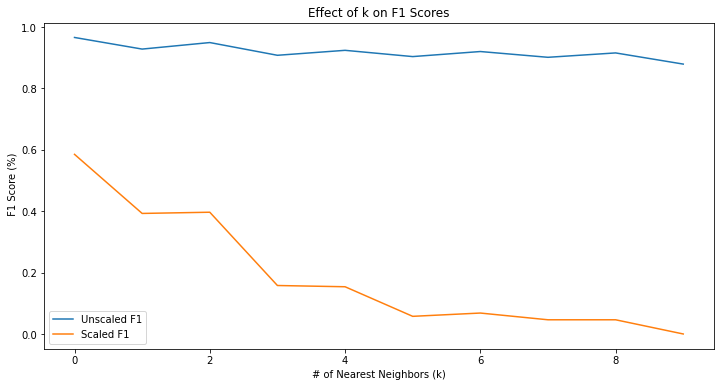

In [31]:
# Plot the results
plt.figure(figsize=(12,6))
plt.plot(scaled_f1, label = "Unscaled F1")
plt.plot(unscaled_f1, label = 'Scaled F1')
plt.xlabel('# of Nearest Neighbors (k)')
plt.ylabel(' F1 Score (%)')
plt.title("Effect of k on F1 Scores")

plt.legend()
plt.show()

#### Probability of paying any insurance benefit is:


In [32]:
for P in [0, df['insurance_benefits_received'].sum() / len(df), 0.5, 1]:

    print(f'The probability: {P:.2f}')
    y_pred_rnd = rnd_model_predict(P, y_test.shape[0]) 
        
    eval_classifier(y_test, y_pred_rnd)
    
    print()

The probability: 0.00
F1: 0.00
Confusion Matrix
[[0.89133333 0.        ]
 [0.10866667 0.        ]]

The probability: 0.11
F1: 0.11
Confusion Matrix
[[0.78666667 0.10466667]
 [0.096      0.01266667]]

The probability: 0.50
F1: 0.16
Confusion Matrix
[[0.44533333 0.446     ]
 [0.06       0.04866667]]

The probability: 1.00
F1: 0.20
Confusion Matrix
[[0.         0.89133333]
 [0.         0.10866667]]



The dummy model gave the highest F1-score of 0.2 with a probability value of 1. This model predicted that all customers will benefit from the insurance.

### Task 3. Regression (with Linear Regression)

With `insurance_benefits` as the target, evaluate what RMSE would be for a Linear Regression model.

Build your own implementation of LR. For that, recall how the linear regression task's solution is formulated in terms of LA. Check RMSE for both the original data and the scaled one. Can you see any difference in RMSE between these two cases?

Let's denote
- $X$ — feature matrix, each row is a case, each column is a feature, the first column consists of unities
- $y$ — target (a vector)
- $\hat{y}$ — estimated tagret (a vector)
- $w$ — weight vector

The task of linear regression in the language of matrices can be formulated as

$$
y = Xw
$$

The training objective then is to find such $w$ that it would minimize the L2-distance (MSE) between $Xw$ and $y$:

$$
\min_w d_2(Xw, y) \quad \text{or} \quad \min_w \text{MSE}(Xw, y)
$$

It appears that there is analytical solution for the above:

$$
w = (X^T X)^{-1} X^T y
$$

The formula above can be used to find the weights $w$ and the latter can be used to calculate predicted values

$$
\hat{y} = X_{val}w
$$

Split the whole data in the 70:30 proportion for the training/validation parts. Use the RMSE metric for the model evaluation.

In [33]:
class MyLinearRegression:
    
    def __init__(self):
        
        self.weights = None
    
    def fit(self, X, y):
        
        # adding the unities
        X2 = np.append(np.ones([len(X), 1]), X, axis=1)
        self.weights = np.linalg.inv(X2.T.dot(X2)).dot(X2.T).dot(y)

    def predict(self, X):
        
        # adding the unities
        X2 = np.append(np.ones([len(X), 1]), X, axis=1)
        y_pred = X2.dot(self.weights)

        return y_pred

In [34]:
# evaluate regression metrics

def eval_regressor(y_true, y_pred):
    
    rmse = math.sqrt(sklearn.metrics.mean_squared_error(y_true, y_pred))
    print(f'RMSE: {rmse:.2f}')
    
    r2_score = math.sqrt(sklearn.metrics.r2_score(y_true, y_pred))
    print(f'R2: {r2_score:.2f}')    

#### Unscaled Data

In [35]:
X = df[['age', 'gender', 'income', 'family_members']].to_numpy()
y = df['insurance_benefits'].to_numpy()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=12345)

lr = MyLinearRegression()

lr.fit(X_train, y_train)
print(lr.weights)

y_test_pred = lr.predict(X_test)
eval_regressor(y_test, y_test_pred)

[-9.43539012e-01  3.57495491e-02  1.64272726e-02 -2.60743659e-07
 -1.16902127e-02]
RMSE: 0.34
R2: 0.66


#### Scaled Data

In [36]:
X = df_scaled[['age', 'gender', 'income', 'family_members']].to_numpy()
y = df_scaled['insurance_benefits'].to_numpy()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=12345)

lr = MyLinearRegression()

lr.fit(X_train, y_train)
print(lr.weights)

y_test_pred = lr.predict(X_test)
eval_regressor(y_test, y_test_pred)

[-0.94353901  2.32372069  0.01642727 -0.02059875 -0.07014128]
RMSE: 0.34
R2: 0.66


#### Conclusion
We built our implementation of the linear regression and calculated the root mean square error (RMSE) and coefficient of determination (
 score) for both the original data and the scaled one. We can see that there is no difference in RMSE and 
 score between these two cases.

### Task 4. Obfuscating Data

It best to obfuscate data by multiplying the numerical features (remember, they can be seen as the matrix $X$) by an invertible matrix $P$. 

$$
X' = X \times P
$$

Try to do that and check how the features' values will look like after the transformation. By the way, the intertible property is important here so make sure that $P$ is indeed invertible.

You may want to review the 'Matrices and Matrix Operations -> Matrix Multiplication' lesson to recall the rule of matrix multiplication and its implementation with NumPy.

In [37]:
# read in the data

personal_info_column_list = ['gender', 'age', 'income', 'family_members']
df_pn = df[personal_info_column_list]

In [38]:
X = df_pn.to_numpy()

Generating a random matrix $P$.

In [39]:
rng = np.random.default_rng(seed=42)
P = rng.random(size=(X.shape[1], X.shape[1]))

Checking the matrix $P$ is invertible

In [40]:
# checking if matrix P is invertible
np.matmul(P, np.linalg.inv(P))


array([[ 1.00000000e+00,  1.85130588e-16, -2.97856902e-16,
        -3.91584367e-17],
       [ 6.23834470e-17,  1.00000000e+00, -7.10568689e-17,
         8.24459807e-17],
       [ 1.03941594e-17,  2.27454503e-17,  1.00000000e+00,
        -5.77784356e-17],
       [-1.02697151e-16, -1.69379178e-16, -2.49945035e-17,
         1.00000000e+00]])

We see that the matrix P is invertible because when we multiply P by its inverse P
, we have ones through the diagonal.

Can you guess the customers' ages or income after the transformation?

In [41]:
# get transformed data X'
X_prime = np.matmul(X, P)
X_prime

array([[ 6359.71527314, 22380.40467609, 18424.09074184, 46000.69669016],
       [ 4873.29406479, 17160.36702982, 14125.78076133, 35253.45577301],
       [ 2693.11742928,  9486.397744  ,  7808.83156024, 19484.86063067],
       ...,
       [ 4346.2234249 , 15289.24126492, 12586.16264392, 31433.50888552],
       [ 4194.09324155, 14751.9910242 , 12144.02930637, 30323.88763426],
       [ 5205.46827354, 18314.24814446, 15077.01370762, 37649.59295455]])

Can you recover the original data from $X'$ if you know $P$? Try to check that with calculations by moving $P$ from the right side of the formula above to the left one. The rules of matrix multiplcation are really helpful here.

In [42]:
# recover original data from X'
X_rec = X_prime.dot(np.linalg.inv(P))
X_rec

array([[ 1.00000000e+00,  4.10000000e+01,  4.96000000e+04,
         1.00000000e+00],
       [ 1.67952800e-12,  4.60000000e+01,  3.80000000e+04,
         1.00000000e+00],
       [-6.23021448e-13,  2.90000000e+01,  2.10000000e+04,
        -2.03032656e-13],
       ...,
       [ 1.57996161e-12,  2.00000000e+01,  3.39000000e+04,
         2.00000000e+00],
       [ 1.00000000e+00,  2.20000000e+01,  3.27000000e+04,
         3.00000000e+00],
       [ 1.00000000e+00,  2.80000000e+01,  4.06000000e+04,
         1.00000000e+00]])

Print all three cases for a few customers
- The original data
- The transformed one
- The reversed (recovered) one

In [43]:
print('Original data')
print(X[:3])
print()
print('Transformed data')
print(X_prime[:3])
print()
print('Reversed (recovered) data')
print(X_rec[:3])

Original data
[[1.00e+00 4.10e+01 4.96e+04 1.00e+00]
 [0.00e+00 4.60e+01 3.80e+04 1.00e+00]
 [0.00e+00 2.90e+01 2.10e+04 0.00e+00]]

Transformed data
[[ 6359.71527314 22380.40467609 18424.09074184 46000.69669016]
 [ 4873.29406479 17160.36702982 14125.78076133 35253.45577301]
 [ 2693.11742928  9486.397744    7808.83156024 19484.86063067]]

Reversed (recovered) data
[[ 1.00000000e+00  4.10000000e+01  4.96000000e+04  1.00000000e+00]
 [ 1.67952800e-12  4.60000000e+01  3.80000000e+04  1.00000000e+00]
 [-6.23021448e-13  2.90000000e+01  2.10000000e+04 -2.03032656e-13]]


You can probably see that some values are not exactly the same as they are in the original data. What might be the reason for that?

Some values are not the same as they were in the original data because of the transformation and precision of NumPy's calculation of the data close to zero.

## Proof That Data Obfuscation Can Work with LR

The regression task has been solved with linear regression in this project. Your next task is to prove _analytically_ that the given obfuscation method won't affect linear regression in terms of predicted values i.e. their values will remain the same. Can you believe that? Well, you don't have to, you should prove it!

So, the data is obfuscated and there is $X \times P$ instead of just $X$ now. Consequently, there are other weights $w_P$ as
$$
w = (X^T X)^{-1} X^T y \quad \Rightarrow \quad w_P = [(XP)^T XP]^{-1} (XP)^T y
$$

How would $w$ and $w_P$ be linked if you simplify the formula for $w_P$ above? 

What would be predicted values with $w_P$? 

What does that mean for the quality of linear regression if you measure it with RMSE?

Check Appendix B Properties of Matrices in the end of the notebook. There are useful formulas in there!

No code is necessary in this section, only analytical explanation!

**Answer**

We have 
 and  are the same, so the RMSE calculated for both the transformed and non transformed dataset will remain the same.
And the quality of linear regression measured with RMSE will be similar.

**Analytical proof**

**How would $w$ and $w_p$  be linked if you simplify the formular for above?**

- Given:

$ w_p = [(XP)^T XP]^{-1}(XP)^Ty \qquad \qquad (1)$

- Expand $ (XP)^T$ using reversivity of transpose property

$w_p = [P^T X^T XP]^{-1} P^T X^T y\qquad \qquad(2)$

- Rearrange square bracket

$w_p = (P^T (X^T X) P)^{-1} P^T X^T y \qquad \qquad(3)$

- and expand the bracket $(P^T (X^T X) P)^{-1}$ as

$ w_p = P^{-1} (X^T X)^{-1} (P^T)^{-1} P^T X^T y \qquad \qquad(4)$

- Since $(P^T)^{-1} P^T = P^T (P^T)^{-1}  = I$

$w_p = P^{-1} (X^T X)^{-1} I X^T y \qquad \qquad(5)$

- applying multiplicative identity property $I X^T = X^T I = X^T$ then

$w_p = P^{-1} (X^T X)^{-1} X^T y \qquad \qquad(6)$


- subtituting $w = (X^T X)^{-1} X^T y$ into equation

$\therefore w_p = P^{-1} w \qquad \qquad(7)$


**What would be predicted values with $𝑤_p$?**

- Given that

$ a = Xw$

- is similar to

$a' = X'w_p$
- where

$X' = XP$
- and

$w_p = P^{-1}w$

- We substitute these values into to have:

$ \begin{align*}
    a' &= XP.P^{-1}w = XIw \\
    \therefore a' &= Xw = a
\end{align*}$


**What does that mean for the quality of linear regression if you measure it with RMSE?**

Since $a'$ is the same as $a$ , we would expect the RMSE calculated for both the original and transformed dataset to be the same. The quality of linear regression measured using RMSE will be similar.

## Test Linear Regression With Data Obfuscation

Now, let's prove Linear Regression can work computationally with the chosen obfuscation transformation.

Build a procedure or a class that runs Linear Regression optionally with the obfuscation. You can use either a ready implementation of Linear Regression from sciki-learn or your own.

Run Linear Regression for the original data and the obfuscated one, compare the predicted values and the RMSE, $R^2$ metric values. Is there any difference?

**Procedure**

- Create a square matrix $P$ of random numbers.
- Check that it is invertible. If not, repeat the first point until we get an invertible matrix.
- <! your comment here !>
- Use $XP$ as the new feature matrix

In [44]:
# square matrix P of random numbers
rng = np.random.default_rng(seed=42)
P = rng.random(size=(X.shape[1], X.shape[1]))
P

array([[0.77395605, 0.43887844, 0.85859792, 0.69736803],
       [0.09417735, 0.97562235, 0.7611397 , 0.78606431],
       [0.12811363, 0.45038594, 0.37079802, 0.92676499],
       [0.64386512, 0.82276161, 0.4434142 , 0.22723872]])

In [45]:
# checking if matrix P is invertible
np.matmul(P, np.linalg.inv(P))

array([[ 1.00000000e+00,  1.85130588e-16, -2.97856902e-16,
        -3.91584367e-17],
       [ 6.23834470e-17,  1.00000000e+00, -7.10568689e-17,
         8.24459807e-17],
       [ 1.03941594e-17,  2.27454503e-17,  1.00000000e+00,
        -5.77784356e-17],
       [-1.02697151e-16, -1.69379178e-16, -2.49945035e-17,
         1.00000000e+00]])

In [46]:
personal_info_column_list = ['gender', 'age', 'income', 'family_members']
df_pn = df[personal_info_column_list]

# features
X = df_pn.to_numpy()

# target
y = df["insurance_benefits"].to_numpy()

In [47]:
# linear regression on original data

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=12345)

lr = MyLinearRegression()

lr.fit(X_train, y_train)
print(lr.weights)

y_test_pred = lr.predict(X_test)
eval_regressor(y_test, y_test_pred)


[-9.43539012e-01  1.64272726e-02  3.57495491e-02 -2.60743659e-07
 -1.16902127e-02]
RMSE: 0.34
R2: 0.66


In [48]:
# linear regression on obfuscated data
X_prime = X.dot(P)

X_train_obs, X_test_obs, y_train_obs, y_test_obs = train_test_split(X_prime, y, test_size=0.3, random_state=12345)

lr = MyLinearRegression()

lr.fit(X_train_obs, y_train_obs)
print(lr.weights)

y_test_pred = lr.predict(X_test_obs)
eval_regressor(y_test_obs, y_test_pred)

[-0.94353904 -0.05791721 -0.01546571  0.09871894 -0.02397536]
RMSE: 0.34
R2: 0.66


We proved mathematically that the RMSE and 
 score for original and obfuscated data should be the same. Now using computational means, we obtained similar RMSE of 0.34 and 
 score of 0.66 for both original and obfuscated data.

## Conclusion

The data was successfully loaded and consists of 5000 rows and 5 columns. The columns were renamed the age column was converted  from float to int datatype. We performed exploratory data analysis on the data and determined whether scaling affects the kNN algorithm. feature scaling is important for kNN algorithms as it calculates distances between data. Similarly, kNN with euclidean distance is sensitive to magnitudes hence, the data should be scaled for all features to weigh in equally.

A custom kNN classifier was built and measured its quality using the F1 metric for both the original data and the scaled data. For both the original and unscaled data, k influences the evaluation metric. The higher the value of k the lower the F1 score recorded. In general, the scaled data gave higher F1 score than the unscaled data so scaling should be done to obtain a better F1 score. The dummy model gave the highest F1-score of 0.2 at a probability value of 1. This model predicted that all customers will benefit from the insurance.

Linear regression model was built which calculated the root mean square error (RMSE) and coefficient of determination ($R^2$ score) for both the original data and the scaled data. There is no difference in RMSE and $R^2$ score between these two cases. Whether the data is scaled or not, the evaluation metric still gave the same result in both cases.

The data was obfuscated and obfuscation was proven analytically to work with linear regression. Computational approach by testing the linear regression with the obfuscated data. In both the original and obfuscated data, we obtained similar RMSE value of 0.34 and $R^2$ score of 0.66. This proves that predicted values, RMSE and  $R^2$ metric will be the same for both the original and obfuscated data.

# Appendices 

## Appendix A: Writing Formulas in Jupyter Notebooks

You can write formulas in your Jupyter Notebook in a markup language provided by a high-quality publishing system called $\LaTeX$ (pronounced "Lah-tech"), and they will look like formulas in textbooks.

To put a formula in a text, put the dollar sign (\\$) before and after the formula's text e.g. $\frac{1}{2} \times \frac{3}{2} = \frac{3}{4}$ or $y = x^2, x \ge 1$.

If a formula should be in its own paragraph, put the double dollar sign (\\$\\$) before and after the formula text e.g.

$$
\bar{x} = \frac{1}{n}\sum_{i=1}^{n} x_i.
$$

The markup language of [LaTeX](https://en.wikipedia.org/wiki/LaTeX) is very popular among people who use formulas in their articles, books and texts. It can be complex but its basics are easy. Check this two page [cheatsheet](http://tug.ctan.org/info/undergradmath/undergradmath.pdf) for learning how to compose the most common formulas.

## Appendix B: Properties of Matrices

Matrices have many properties in Linear Algebra. A few of them are listed here which can help with the analytical proof in this project.

<table>
<tr>
<td>Distributivity</td><td>$A(B+C)=AB+AC$</td>
</tr>
<tr>
<td>Non-commutativity</td><td>$AB \neq BA$</td>
</tr>
<tr>
<td>Associative property of multiplication</td><td>$(AB)C = A(BC)$</td>
</tr>
<tr>
<td>Multiplicative identity property</td><td>$IA = AI = A$</td>
</tr>
<tr>
<td></td><td>$A^{-1}A = AA^{-1} = I$
</td>
</tr>    
<tr>
<td></td><td>$(AB)^{-1} = B^{-1}A^{-1}$</td>
</tr>    
<tr>
<td>Reversivity of the transpose of a product of matrices,</td><td>$(AB)^T = B^TA^T$</td>
</tr>    
</table>